<a href="https://colab.research.google.com/github/tsakailab/prml/blob/master/ipynb/ex_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# データの自動分類（data clustering）

距離や類似度に基づきデータをグループ分けする手法を観察しましょう．

参考資料：
- [Cluster analysis@Wikipedia](https://en.wikipedia.org/wiki/Cluster_analysis)
- [Clustering@scikit-learn](https://scikit-learn.org/stable/modules/clustering.html)

----

氏名：

学生番号：

----
## 基本課題（必須）

    1. 「★クラスタリング結果の評価値を計算します」まで実行すると表示される各評価値は，クラスタリングの結果のどのような性質を表していますか．
       また，Example (a) の n_samples が [40,100,100,100] と [400,100,100,100] の場合では，k平均法（sklearn.cluster.KMeans）で
       4つのクラスタに分けた結果の評価値が異なります．その原因を説明してください．

（ここに回答を書いてください）



    2. k平均法の "Sum of squared distances" と "Silhouette score" の値から，どのようにクラスタの数を推測できる場合がありますか．
       Example (a) の n_samples が [40,100,100,100] と [400,100,100,100] の場合について，k平均法で
       「☆クラスタ数による依存性を観察しましょう」まで実行し，考察してください．

（ここに回答を書いてください）



    3. Example (b) (k=4) や Example (c) (k=2) では，混合ガウスモデル（sklearn.mixture.GaussianMixture）を用いると k平均法よりも
       正解に近いクラスタが得られることがあります．その理由を考察してください．

（ここに回答を書いてください）



    4.その他，気づいたこと，調べたことを書いてください．

（ここに回答を書いてください）


----
発展課題（任意）がこのノートブックの後半にあります．

In [ ]:
#@title 2次元データ X を y で色分けしてプロットする関数 plot2d(X, y) を定義します．

import numpy as np
from matplotlib.colors import TwoSlopeNorm as tsn
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

def plot2d(X, y=None, title="", xlabel="", ylabel="", axis="on", zorder=0, s=20, linewidths=0.5, margin=0.5, ax=None, dpi=100, fontsize=12):
    if X.shape[1] != 2: return

    if ax is None:
        _, ax = plt.subplots(dpi=dpi)

    plt.subplots_adjust(wspace=0.5)

    xlim = [X[:, 0].min() - margin, X[:, 0].max() + margin]
    ylim = [X[:, 1].min() - margin, X[:, 1].max() + margin]

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_title(title, fontsize=fontsize)
    #ax.set_title(title, y=-0.15, pad=-6)
    ax.set_xlabel(xlabel, fontsize=fontsize)
    ax.set_ylabel(ylabel, fontsize=fontsize)
    ax.axis(axis)
    ax.set_aspect(1)
    ax.tick_params(labelsize=fontsize)

    if y is not None:
        classes = np.unique(y)
        for yi in classes:
            ax.scatter(
                *X[y == yi].T,
                marker=f"${yi}$",
                s=s,
                linewidths=linewidths,
                color=plt.cm.tab10(yi), #Paired(yi),
                alpha=0.8,
                zorder=zorder,
            )
    else:
        ax.scatter(*X.T, marker=".", s=s, color='k', alpha=0.8, zorder=2)

    return ax

from matplotlib import pyplot as plt

### 実験用のデータ（2次元，2クラス）を生成します．
- Example (a)～(d) からひとつ選んで実行してください．

In [ ]:
# Example (a): four blobs (k=4)
from sklearn.datasets import make_blobs
n_samples = [40,100,100,100]
X, y = make_blobs(n_samples=n_samples, cluster_std=[2,1,1,1], random_state=1)

In [ ]:
# Example (b): four non-spherical blubs (k=4)
from sklearn.datasets import make_blobs
A = [[1.2, -0.6], [-0.6, 0.8]]
n_samples = [100,100,100,100]
X, y = make_blobs(n_samples=n_samples, cluster_std=[2,0.8,0.8,0.8], random_state=1)
X = X.dot(A)

In [ ]:
# Example (c): cocentric circles (k=2)
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=300, noise=0.1, random_state=0, factor=0.2)
X *= 10

In [ ]:
# Example (d)
# https://cs.joensuu.fi/sipu/datasets/
import pandas as pd
#url = "https://cs.joensuu.fi/sipu/datasets/Aggregation.txt"
url = "https://cs.joensuu.fi/sipu/datasets/spiral.txt"  # (k=3)
df = pd.read_csv(url, sep='\s+')
X, y = df.values[:,:2], df.values[:,2].astype(int)

In [ ]:
#@title データを表示します．
print("# of X =", len(X))
plot2d(X)
plt.show()

## scikit-learn を用いたクラスタリング

- [sklearn.cluster](https://scikit-learn.org/stable/modules/clustering.html)
- $k$平均法：[sklearn.cluster.KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)，[K-means@scikit-learn](https://scikit-learn.org/stable/modules/clustering.html)
- 混合ガウスモデル：[sklearn.mixture.GaussianMixture](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html)，[Gaussian mixture models@scikit-leaern](https://scikit-learn.org/stable/modules/mixture.html)
- スペクトラルクラスタリング：[sklearn.cluster.SpectralClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html)

In [ ]:
k = 4

# k-means clustering
from sklearn.cluster import KMeans
model = KMeans(init="random", n_clusters=k, n_init=10)#, verbose=1)
y_pred = model.fit_predict(X)
print("Sum of squared distances: ", - model.score(X))

# # Gaussian mixture (soft clustering)
# from sklearn.mixture import GaussianMixture
# model = GaussianMixture(n_components=k, n_init=100, means_init=X[np.random.choice(len(X),k),:]) # init_params='random_from_data'
# y_pred = model.fit_predict(X)
# print("Opposite of per-sample average log-likelihood: ", - model.score(X))

# # Spectral clustering
# from sklearn.cluster import SpectralClustering
# model = SpectralClustering(n_clusters=k, gamma=1.0)
# y_pred = model.fit_predict(X)

In [ ]:
#@title クラスタリングの結果を図示します．<p>左：クラスタリングの結果，右：正解ラベル．ラベルの番号が一致する必要はありません．</p>
_, ax = plt.subplots(1,2, dpi=150)

if hasattr(model, 'cluster_centers_'):
    centroids = model.cluster_centers_
    ax[0].scatter(centroids[:, 0], centroids[:, 1], marker="x",s=40, color="k")

plot2d(X, y_pred, ax=ax[0], title="Predected")
plot2d(X, y, ax=ax[1], title="Ground truth")
plt.show()

### ★クラスタリング結果の評価値を計算します．

- [Homogeneity, completeness and V-measure](https://scikit-learn.org/stable/modules/clustering.html#homogeneity-completeness-and-v-measure)
- [Silhouette score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)
- [その他](https://scikit-learn.org/stable/modules/classes.html#clustering-metrics)

In [ ]:
from sklearn.metrics.cluster import homogeneity_score
print("Homogeneity  [0,1]: ", homogeneity_score(y, y_pred))

from sklearn.metrics.cluster import completeness_score
print("Completeness [0,1]: ", completeness_score(y, y_pred))

from sklearn.metrics.cluster import v_measure_score
print("V-measure    [0,1]: ", v_measure_score(y, y_pred))

from sklearn.metrics.cluster import silhouette_score
print("Silhouette score [-1,1]: ", silhouette_score(X, y_pred))

### ☆クラスタ数による依存性を観察しましょう．

In [ ]:
# k-means clustering 
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import silhouette_score

k_clusters = [2, 3, 4, 5, 6, 7, 8]
result = {'score': [], 'sil': []}
_, ax = plt.subplots(1, len(k_clusters), dpi=180, figsize=(len(k_clusters),8))

for i, k in enumerate(k_clusters):
    model = KMeans(init="random", n_clusters=k, n_init=10)
    y_pred = model.fit_predict(X)
    result['score'].append(-model.score(X))   #(model.inertia_)
    result['sil'].append(silhouette_score(X, y_pred))
    plot2d(X, y_pred, ax=ax[i], title="k = "+str(k), fontsize=6, s=4, linewidths=0.2)
    ax[i].scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], marker="x" ,s=10, color="k")

_, ax = plt.subplots(1,2, figsize=(12,4))
ax[0].plot(k_clusters, result['score'], 'o-'); ax[0].set_title("Sum of squared distances"); ax[0].set_xticks(k_clusters)
ax[1].bar(k_clusters, result['sil']); ax[1].set_title("Silhouette score"); ax[1].set_xticks(k_clusters)
plt.show()

--------
## 発展課題（任意）

    1. データが分割表（contingency table）で与えられ，行と列の対応関係に基づくクラスタリングが
       有効と考えられる応用には，下記の商品と顧客の例の他に，どのようなものがあるでしょうか．

（ここに回答を書いてください）



    2. 下記の例を実行すると，共クラスタリング（co-clustering）と呼ばれる手法で商品と顧客がそれぞれどのようにグループ分けされますか．
       また，そのグループ分けの結果が適切であると考えられる理由を述べてください．

（ここに回答を書いてください）


    3. 共クラスタリング（co-clustering）の原理および主成分分析との関係を説明してください．
       キーワード：類似度行列（affinity matrix），行列の階数（matrix rank），特異値分解（singular value decomposition）

（ここに回答を書いてください）

商品と顧客の関係を表すデータの例．類似の商品や，嗜好の似た顧客のグループを見つけよう．

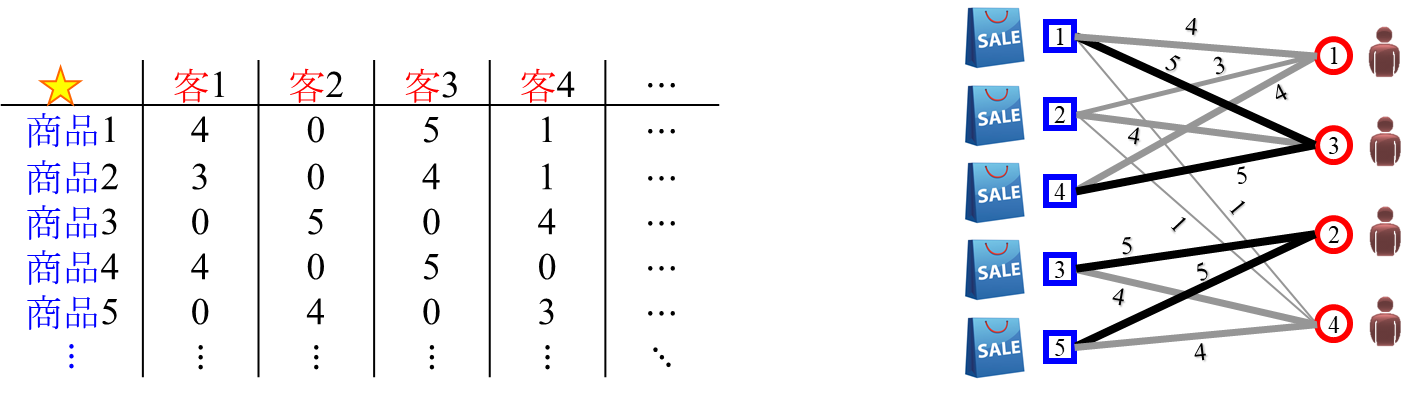

左：分割表（contingency table），右：二部グラフによる表現<br>
（商品と顧客のグループが見やすくなるようにグラフの節を並び替えています）．

In [ ]:
# m=5個の商品と，n=4人の顧客の分割表
C = np.array([[     4,      0,      5,      1],
             [     3,      0,      4,      1],
             [     0,      5,      0,      4],
             [     4,      0,      5,      0],
             [     0,      4,      0,      3]])
m, n = C.shape

In [ ]:
# scikit-learn の SpectralCoClustering で共クラスタリングができます．
from sklearn.cluster import SpectralCoclustering
n_clusters = 2
model = SpectralCoclustering(n_clusters=n_clusters)
model.fit(C)

label_products, label_customers = model.row_labels_, model.column_labels_ 
for c in range(n_clusters):
    print("Cluster #", c, ": products", np.where(label_products==c)[0]+1, "and customers", np.where(label_customers==c)[0]+1)

### 分割表の主成分分析
商品を特徴付ける行ベクトル，顧客を特徴付ける列ベクトルについて，それぞれ第1・第2主成分を用いて2次元に次元圧縮してみます．

In [ ]:
# 商品の主成分分析

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
feat_products = scaler.fit_transform(C)
feat_products = scaler.transform(feat_products)

n_components=2
from sklearn.decomposition import PCA
model = PCA(n_components=n_components)
z_products = model.fit_transform(feat_products)

from matplotlib import pyplot as plt
_, ax = plt.subplots()
ax.plot(z_products[:,0], z_products[:,1], "bs"); ax.set_xlim([-2,2]); ax.set_ylim([-2,2]); ax.set_aspect(1)
for i in range(m):
    ax.annotate(i+1, (z_products[i,0], z_products[i,1]), xytext=(5,5), textcoords='offset points')

In [ ]:
# 顧客の主成分分析

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
feat_customers = scaler.fit_transform(C.T)
feat_customers = scaler.transform(feat_customers)

n_components=2
from sklearn.decomposition import PCA
model = PCA(n_components=n_components)
z_customers = model.fit_transform(feat_customers)

from matplotlib import pyplot as plt
_, ax = plt.subplots()
ax.plot(z_customers[:,0], z_customers[:,1], "ro"); ax.set_xlim([-2,2]); ax.set_ylim([-2,2]); ax.set_aspect(1)
for i in range(n):
    ax.annotate(i+1, (z_customers[i,0], z_customers[i,1]), xytext=(5,5), textcoords='offset points')

お疲れさまでした．